In [1]:
#import python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0,'../scripts/')
from process import *
import warnings
warnings.filterwarnings('ignore')
telcom_df = pd.read_csv('../data/telecom.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
telcom_df.drop("Unnamed: 0",axis=1,inplace=True)

In [2]:
telcom_df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


discribe column data

In [3]:
discribe = get_df_discribe(telcom_df)

discribe

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


get information about dataframe

In [4]:
telcom_df_information = get_df_information(telcom_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

shape of the dataframe


In [5]:
telcom_df.shape

(150001, 55)

get all columns

In [6]:
telcom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


view all null value from all columns

In [7]:
view_df_null_count = get_df_null_count(telcom_df)
view_df_null_count

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Handling missing value

get percentage of missing value in dataset

In [8]:
telecom_missing = get_df_percent_missing(telcom_df)
telecom_missing

'The telecom contains 12.5% missing values.'

percentage of missing for each column

In [9]:
telecom_column_percentage = get_missing_colum_percentage(telcom_df)

telecom_column_percentage

,num_missing,percent_missing (%)
Bearer Id,991,0.66
Start,1,0.00
Start ms,1,0.00
End,1,0.00
End ms,1,0.00
Dur. (ms),1,0.00
IMSI,570,0.38
MSISDN/Number,1066,0.71
IMEI,572,0.38
Last Location Name,1153,0.77


Drop columns with more than 30% missing values

In [10]:
telecom_clean = telcom_df.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 31250B < Vol DL < 125000B'], axis=1)
telecom_clean.shape

(150001, 45)

In [11]:
telecom_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [12]:

telecom_clean = telecom_clean.dropna(subset=['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number'])

In [13]:

telecom_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


filling missing value with mean and mode

In [14]:
missing_columns_lists = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)',
'250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Last Location Name','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B']

for value in missing_columns_lists:
  if(value!="Last Location Name"):
    telecom_clean[value] = telecom_clean[value].fillna(telecom_clean[value].mean())
  else:
    telecom_clean[value] = telecom_clean[value].fillna(telecom_clean[value].mode()[0])

In [15]:
telecom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148506 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL (kbp

In [16]:
#save the cleaned data 
telecom_clean.to_csv("../data/telecom_clean_data.csv")


Transforming Data

Scaling and Normalization


Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1320,8.525034
220,272.150540
405,48.644462
961,271.918281
397,147.553829


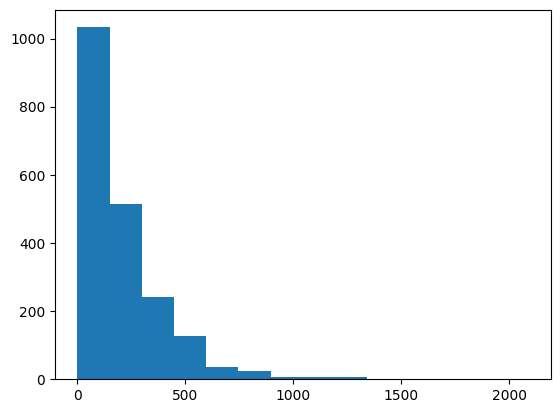

In [18]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()


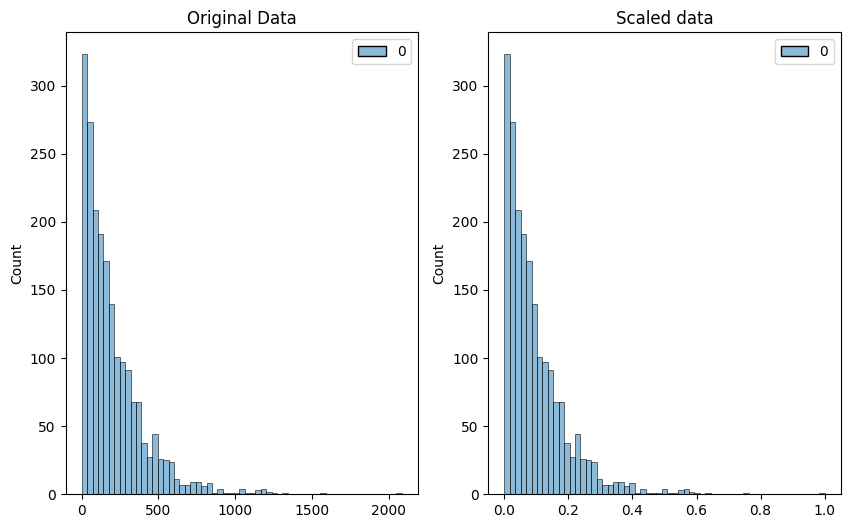

In [19]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

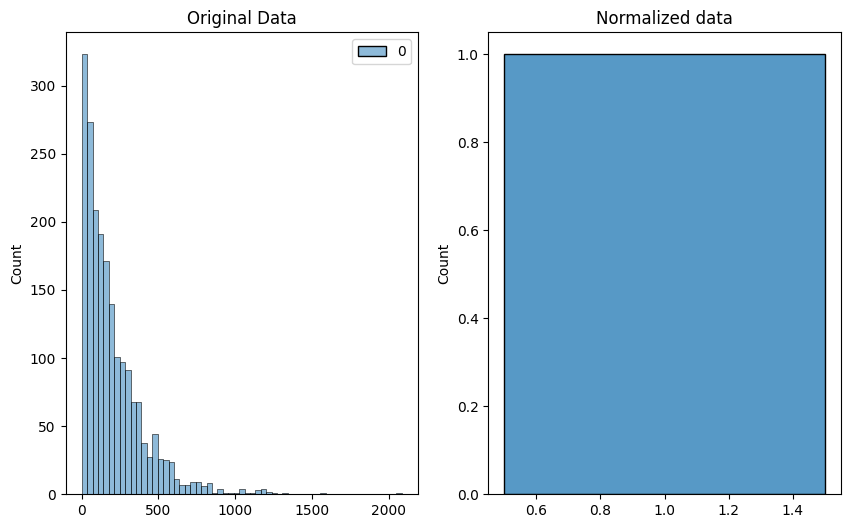

In [20]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)